In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")


In [3]:
df.head()


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


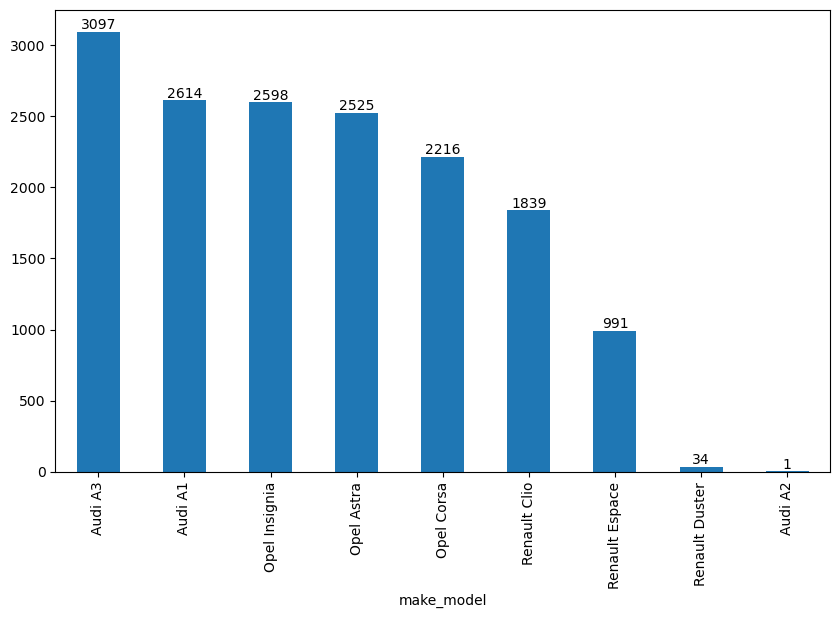

In [7]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

In [8]:
df.drop(index=[2614], inplace =True)

<Axes: xlabel='price', ylabel='Count'>

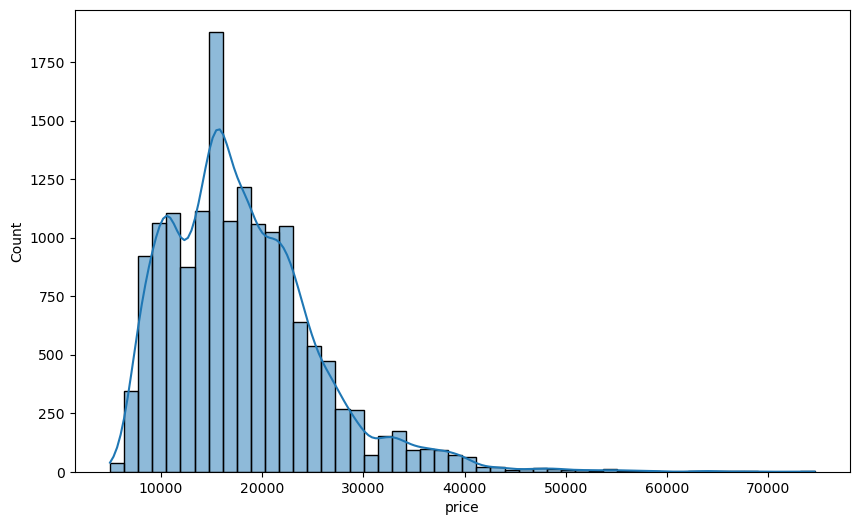

In [9]:
sns.histplot(df.price, bins=50, kde=True)

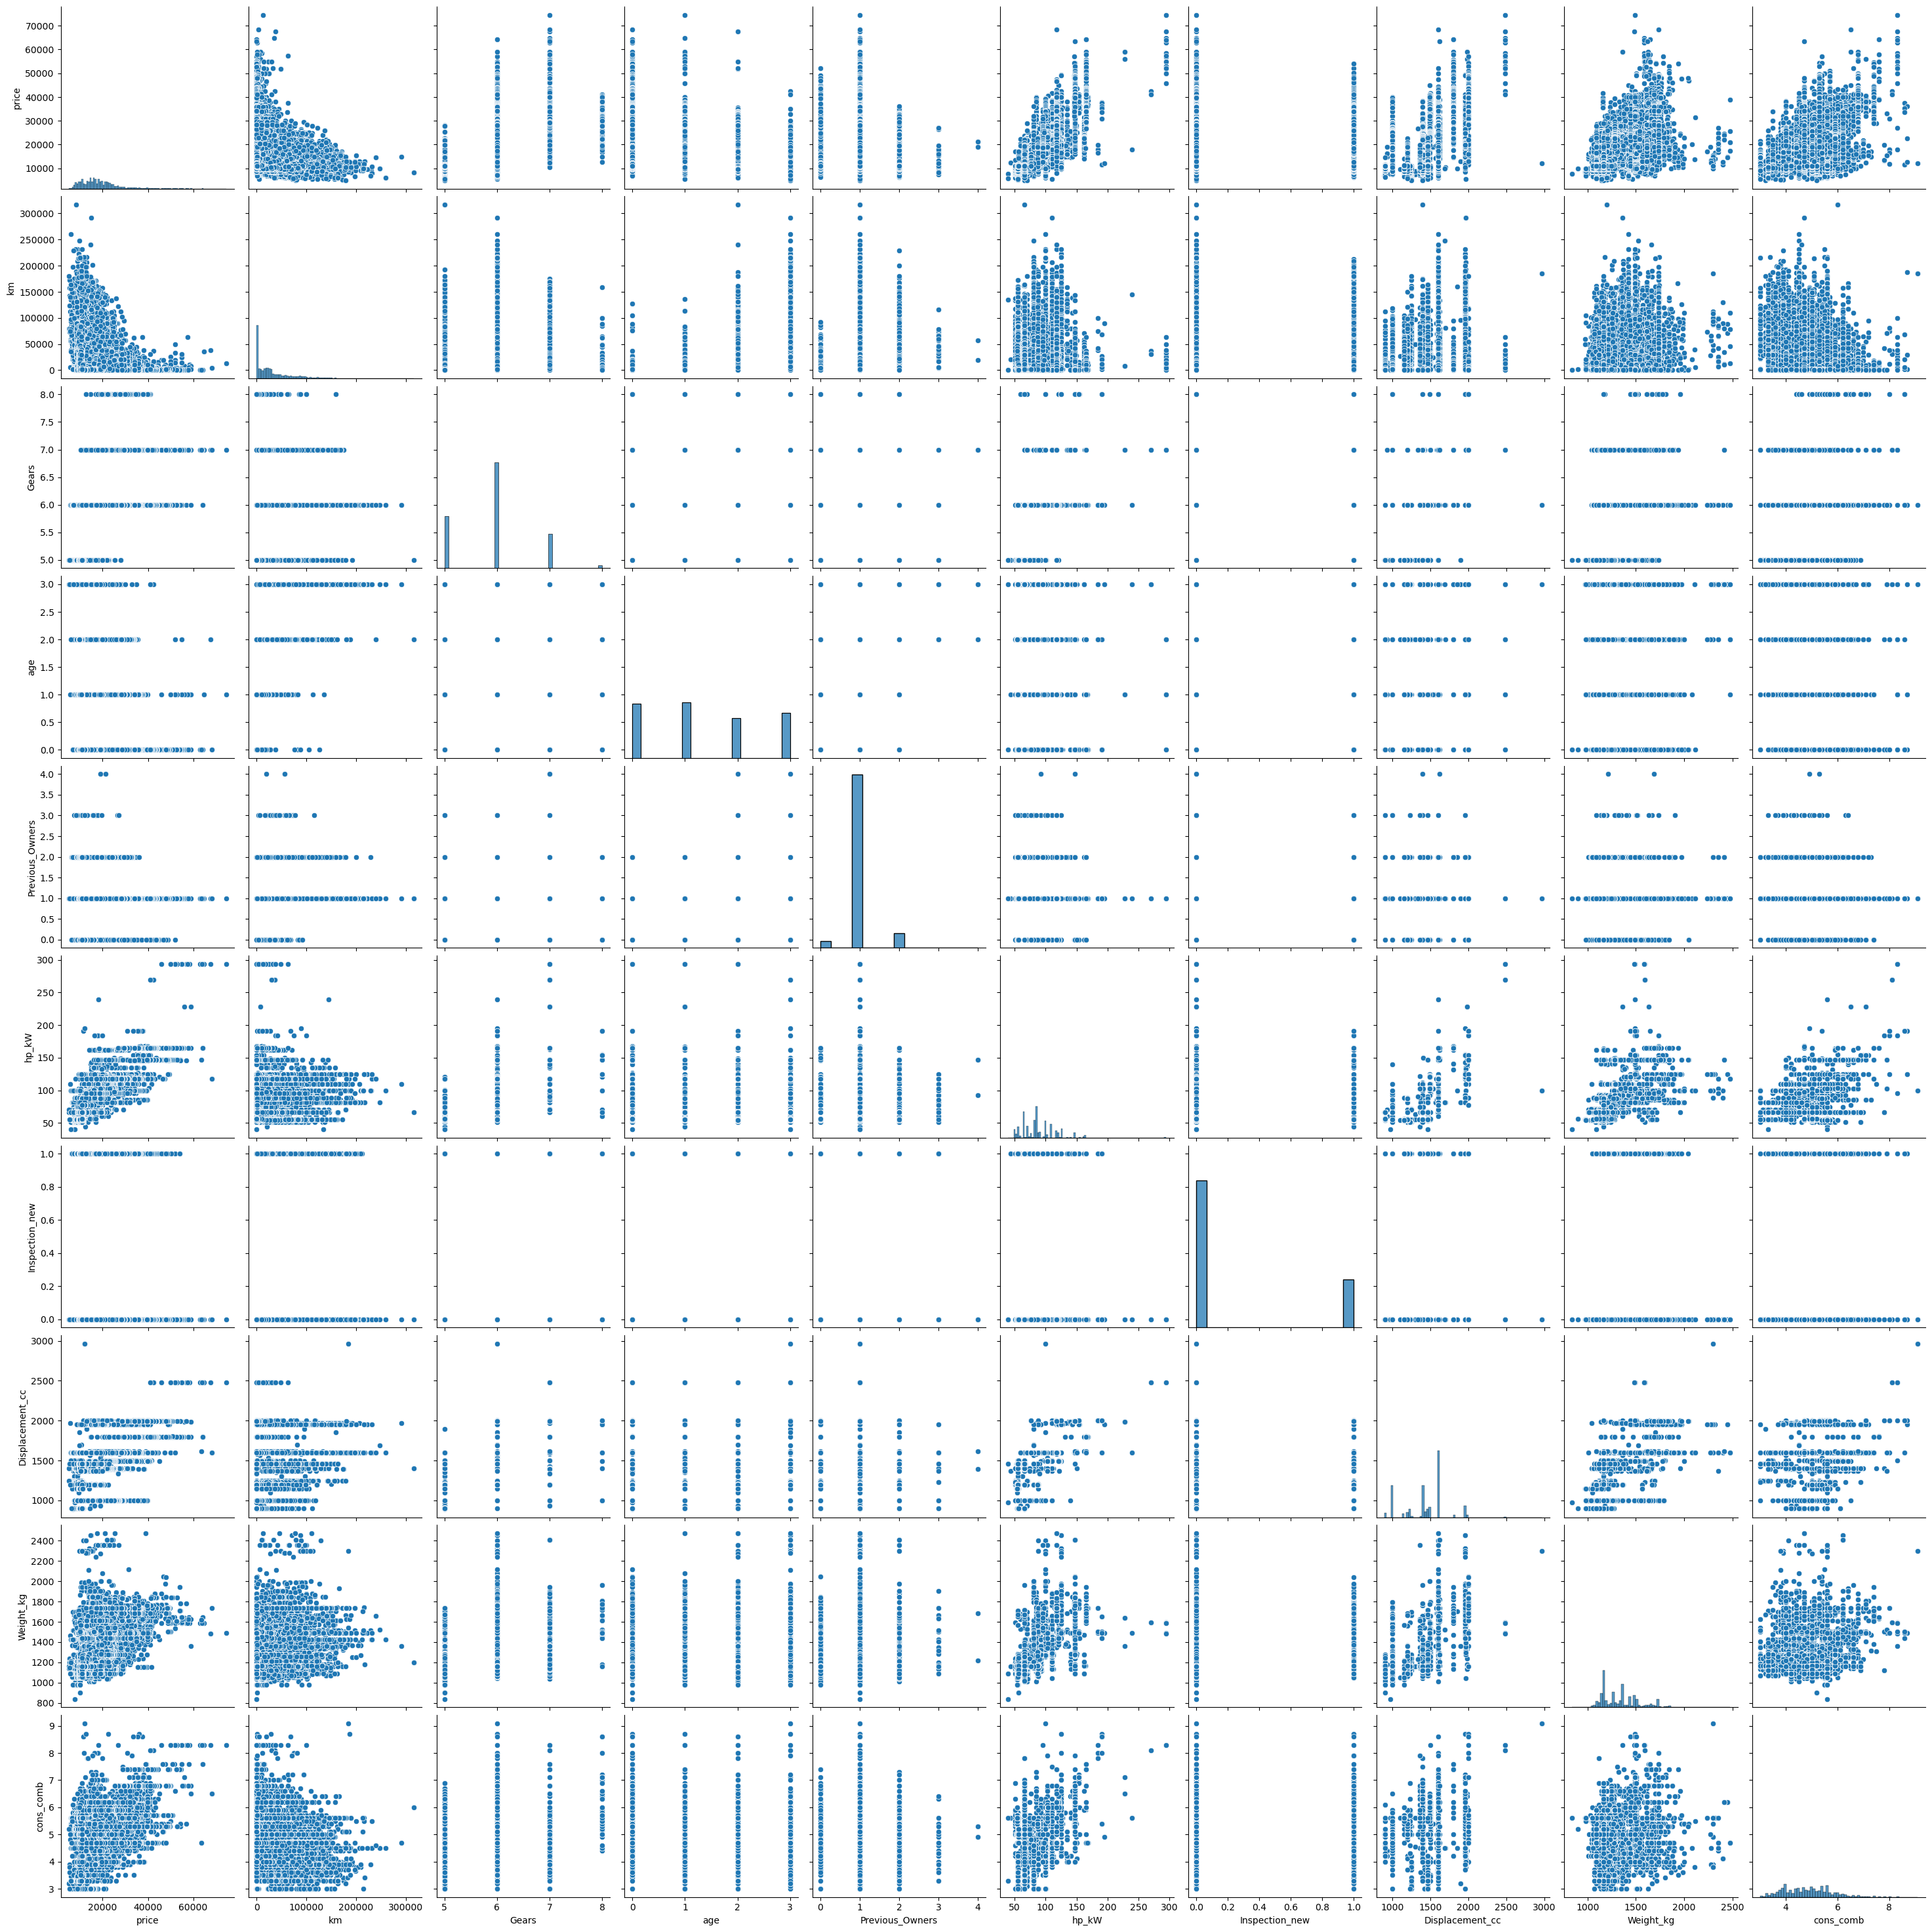

In [10]:
sns.pairplot(df, size=3);

In [11]:
df.head()


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


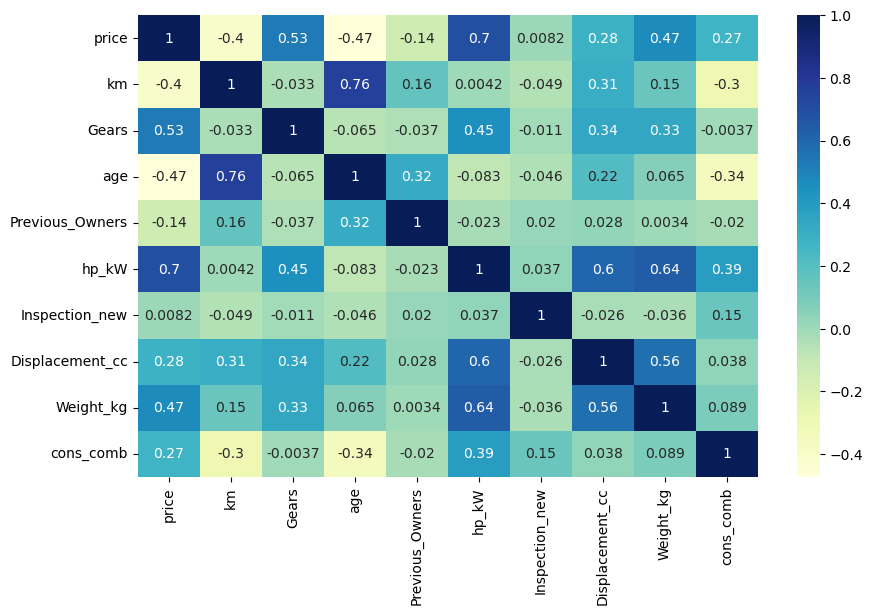

In [12]:
# plotting correlation heatmap 
dataplot=sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show()



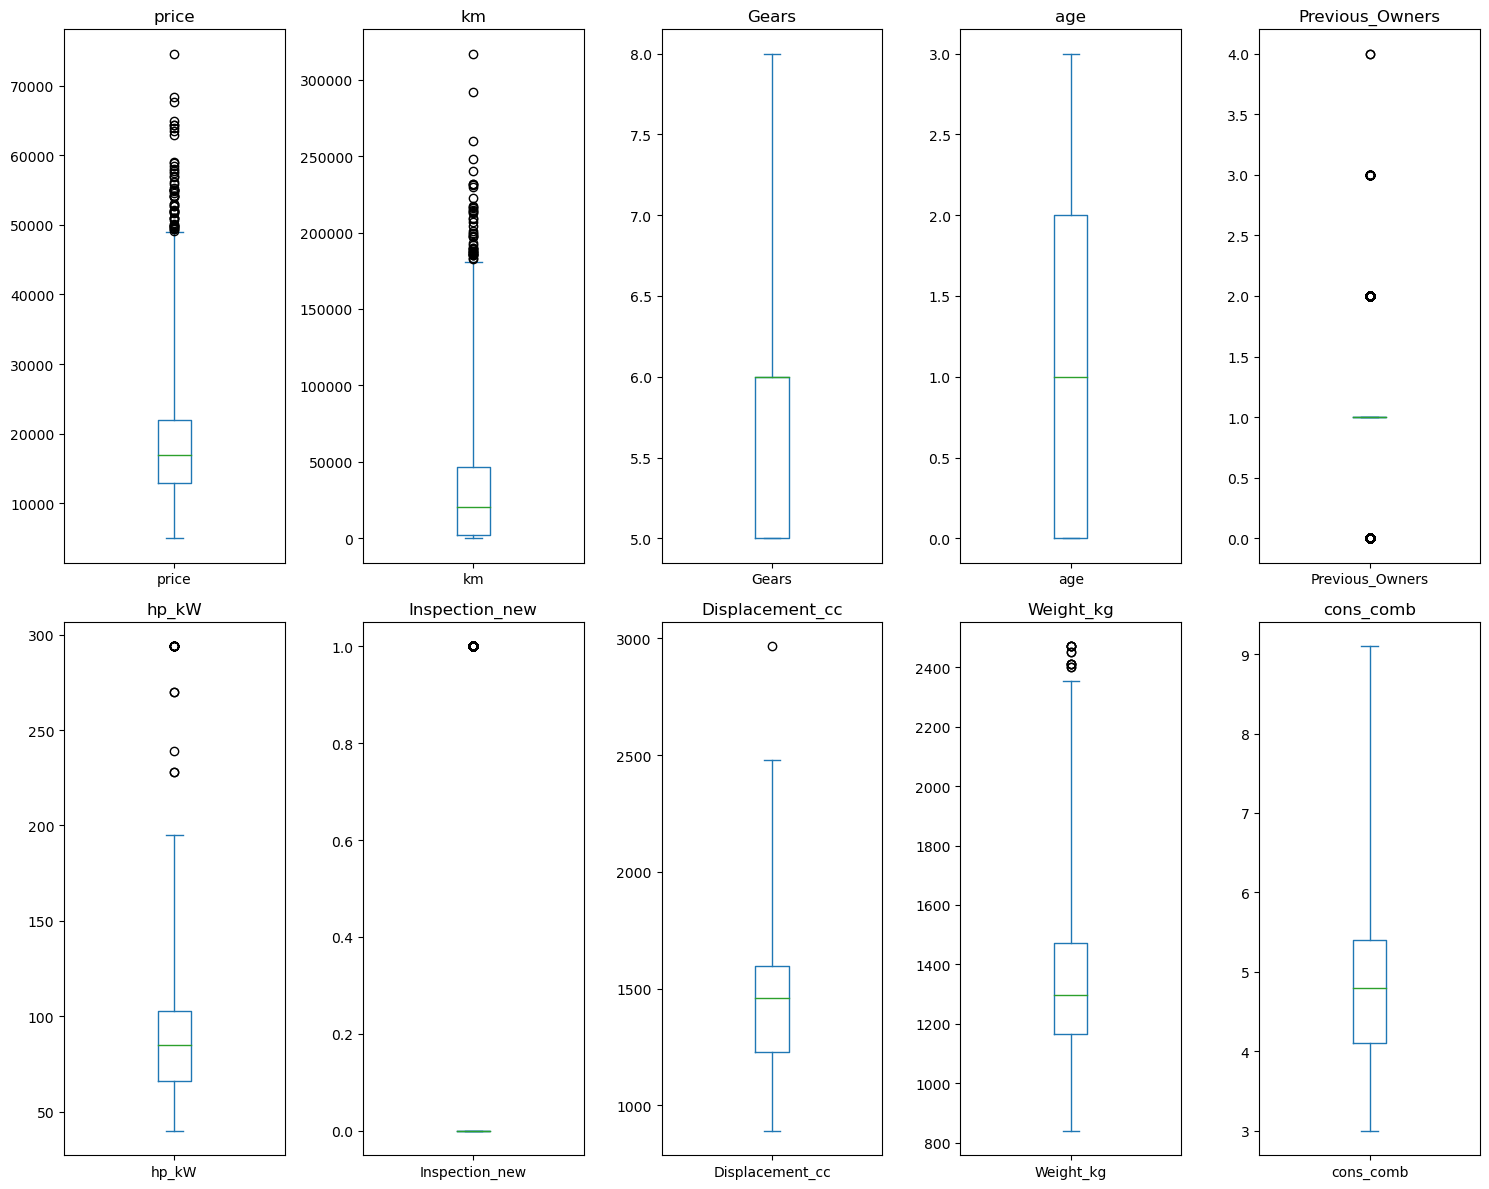

In [13]:
# boxplot for numerical features
numerical_features = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(2, 5, figsize=(15, 12))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(numerical_features):
    df[col].plot.box(ax=axes[i], whis=3)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [14]:
new_list=["age", "hp_kW", "km", "Gearing_Type", 'make_model']

In [15]:
new_list1=["age", "hp_kW", "km", "Gearing_Type", 'make_model',"price"]
df1 = df[new_list1]

In [16]:
X = df[new_list]
X


,age,hp_kW,km,Gearing_Type,make_model
0,3.0,66.0,56013.000000,Automatic,Audi A1
1,2.0,141.0,80000.000000,Automatic,Audi A1
2,3.0,85.0,83450.000000,Automatic,Audi A1
3,3.0,66.0,73000.000000,Automatic,Audi A1
4,3.0,66.0,16200.000000,Automatic,Audi A1
...,...,...,...,...,...
15910,0.0,147.0,1647.362609,Automatic,Renault Espace
15911,0.0,165.0,9900.000000,Automatic,Renault Espace
15912,0.0,146.0,15.000000,Automatic,Renault Espace
15913,0.0,147.0,10.000000,Automatic,Renault Espace


In [17]:
y = df.price
y


0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15910    39950
15911    39885
15912    39875
15913    39700
15914    40999
Name: price, Length: 15914, dtype: int64

In [18]:
X.shape

(15914, 5)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [20]:
enc.fit(X)

OrdinalEncoder()

In [21]:
X.head()

,age,hp_kW,km,Gearing_Type,make_model
0,3.0,66.0,56013.0,Automatic,Audi A1
1,2.0,141.0,80000.0,Automatic,Audi A1
2,3.0,85.0,83450.0,Automatic,Audi A1
3,3.0,66.0,73000.0,Automatic,Audi A1
4,3.0,66.0,16200.0,Automatic,Audi A1


In [22]:
ordinal = X[["Gearing_Type","make_model"]] = enc.fit_transform(X[["Gearing_Type","make_model"]])
ordinal

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 7.],
       [0., 7.],
       [0., 7.]])

In [23]:
X.head()

,age,hp_kW,km,Gearing_Type,make_model
0,3.0,66.0,56013.0,0.0,0.0
1,2.0,141.0,80000.0,0.0,0.0
2,3.0,85.0,83450.0,0.0,0.0
3,3.0,66.0,73000.0,0.0,0.0
4,3.0,66.0,16200.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn import svm

svm = svm.SVC()
#Train a model
svm.fit(X_train, y_train)




SVC()

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred, squared=True),                          
    "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
   },
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred, squared=True),
    "rmse": mean_squared_error(y_test, y_pred, squared=False),
    }}
    
    return scores

In [29]:
train_val(svm, X_train, y_train, X_test, y_test)

{'train': {'R2': -0.6328623371309112,
  'mae': 6773.435786662478,
  'mse': 88830909.8379546,
  'rmse': 9425.015110754708},
 'test': {'R2': -0.6014631562109538,
  'mae': 6690.116870876532,
  'mse': 87748427.10587496,
  'rmse': 9367.413042343918}}

In [30]:
# saving the model 
import pickle 

pickle.dump(svm, open("svm","wb"))
pickle.dump(enc, open("transformer1","wb"))